# Badanie intensywności procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
points_h=pd.read_csv('dane_tymczasowe_HP.csv')
points_uh=pd.read_csv('dane_tymczasowe_UP.csv')
points_m=pd.read_csv('dane_tymczasowe_M.csv')
points_t=pd.read_csv('dane_tymczasowe_T.csv')

Badanie intensywności procesu punktowego metodą szacowania lokalnego

Text(0, 0.5, 'Y')

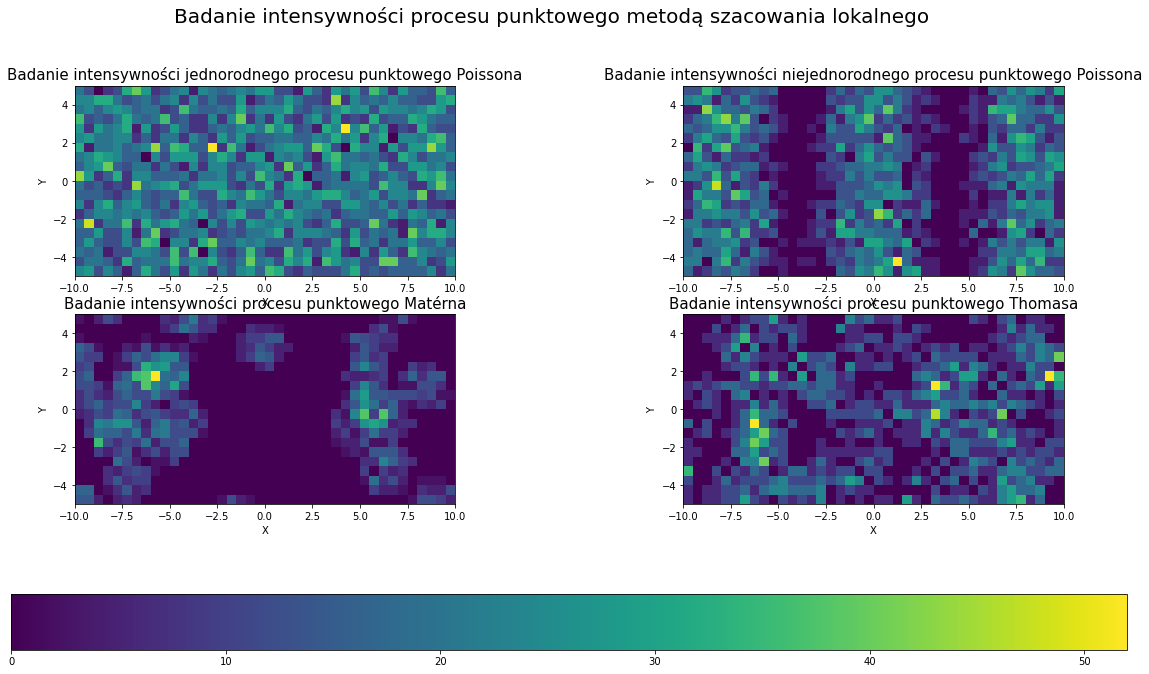

In [3]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    xpoints=np.linspace(x_lim[0], x_lim[1], bins[0]+1)
    ypoints=np.linspace(y_lim[0], y_lim[1], bins[1]+1)
    
    H, xedges, yedges = np.histogram2d(points["X"], points["Y"], bins=(xpoints, ypoints))
    H = H.T
    return [xpoints,ypoints,H]

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    xlim=(x_lim[1]-x_lim[0])/bins[0]
    ylim=(y_lim[1]-y_lim[0])/bins[1]
    data=point_count_on_subregions(points, bins, x_lim, y_lim)
    H = data[2]/xlim/ylim
    return [data[0],data[1],H]

regions=[40,20]
x_lim = [-10,10]
y_lim = [-5,5]
intensity_points_h=intensity_on_subregions(points_h, regions, x_lim, y_lim)
intensity_points_uh=intensity_on_subregions(points_uh, regions, x_lim, y_lim)
intensity_points_m=intensity_on_subregions(points_m, regions, x_lim, y_lim)
intensity_points_t=intensity_on_subregions(points_t, regions, x_lim, y_lim)

fig,ax=plt.subplots(2,2,figsize=(20,11))
fig.suptitle("Badanie intensywności procesu punktowego metodą szacowania lokalnego", fontsize=20)

ax[0,0].grid(False)
tfc=ax[0,0].pcolormesh(intensity_points_h[0],intensity_points_h[1],intensity_points_h[2])
fig.colorbar(tfc,ax=ax, orientation = 'horizontal')
ax[0,0].set_title("Badanie intensywności jednorodnego procesu punktowego Poissona",fontsize=15)
ax[0,0].set_aspect('equal', 'box')
ax[0,0].set_xlabel('X')
ax[0,0].set_ylabel('Y')

ax[0,1].grid(False)
ax[0,1].pcolormesh(intensity_points_uh[0],intensity_points_uh[1],intensity_points_uh[2])
ax[0,1].set_title("Badanie intensywności niejednorodnego procesu punktowego Poissona",fontsize=15)
ax[0,1].set_aspect('equal', 'box')
ax[0,1].set_xlabel('X')
ax[0,1].set_ylabel('Y')

ax[1,0].grid(False)
ax[1,0].pcolormesh(intensity_points_m[0],intensity_points_m[1],intensity_points_m[2])
ax[1,0].set_title("Badanie intensywności procesu punktowego Matérna",fontsize=15)
ax[1,0].set_aspect('equal', 'box')
ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Y')

ax[1,1].grid(False)
ax[1,1].pcolormesh(intensity_points_t[0],intensity_points_t[1],intensity_points_t[2])
ax[1,1].set_title("Badanie intensywności procesu punktowego Thomasa",fontsize=15)
ax[1,1].set_aspect('equal', 'box')
ax[1,1].set_xlabel('X')
ax[1,1].set_ylabel('Y')

Badanie intensywności procesu punktowego metodą funkcji jądrowych

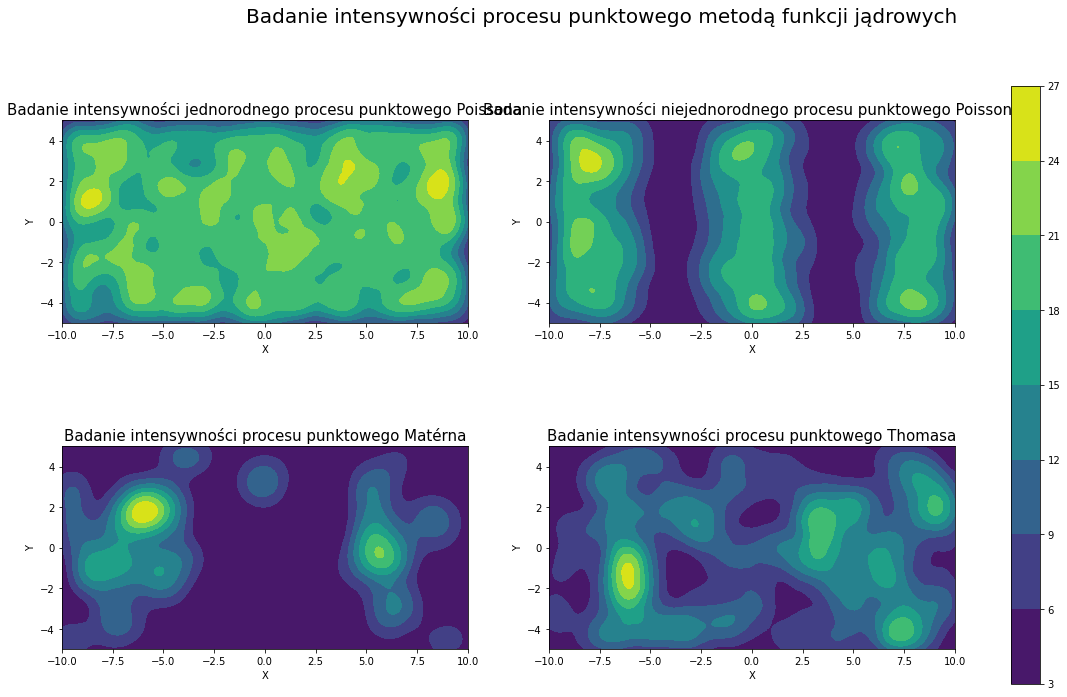

In [4]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    mx=np.linspace(x_lim[0], x_lim[1], grid[0])
    my=np.linspace(y_lim[0], y_lim[1], grid[1])
    px,py=np.meshgrid(mx,my)
    px0=np.zeros(px.size)
    px=px.flatten()
    py=py.flatten()
    p={'X':px, 'Y':py, 'I':px0.flatten()}
    intensity_data=pd.DataFrame(p)
    
    px0=np.zeros(points['X'].size)
    py0=np.zeros(points['Y'].size)
    
    for i in range(intensity_data['I'].size):
        suma=0
        tempx=px[i]
        tempy=py[i]
        px0=tempx-points['X']
        py0=tempy-points['Y']
        odl_pom_w=px0**2+py0**2
        odl_pom=odl_pom_w<kernel_radius**2
        intensity_data['I'][i]=sum(3/np.pi/kernel_radius**2*(1-odl_pom_w[odl_pom]/kernel_radius**2)**2)
    return intensity_data

intensity_data_h=intensity_on_kde(points_h, 1.5, [200,100], [-10,10], [-5,5])
intensity_data_uh=intensity_on_kde(points_uh, 1.5, [200,100], [-10,10], [-5,5])
intensity_data_m=intensity_on_kde(points_m, 1.5, [200,100], [-10,10], [-5,5])
intensity_data_t=intensity_on_kde(points_t, 1.5, [200,100], [-10,10], [-5,5])

fig,ax=plt.subplots(2,2,figsize=(20,11))
fig.suptitle("Badanie intensywności procesu punktowego metodą funkcji jądrowych", fontsize=20)

ax[0,0].tricontourf(intensity_data_h["X"],intensity_data_h["Y"],intensity_data_h["I"])
ax[0,0].set_title("Badanie intensywności jednorodnego procesu punktowego Poissona",fontsize=15)
ax[0,0].set_aspect('equal', 'box')
ax[0,0].set_xlabel('X')
ax[0,0].set_ylabel('Y')

ax[0,1].tricontourf(intensity_data_uh["X"],intensity_data_uh["Y"],intensity_data_uh["I"])
ax[0,1].set_title("Badanie intensywności niejednorodnego procesu punktowego Poissona",fontsize=15)
ax[0,1].set_aspect('equal', 'box')
ax[0,1].set_xlabel('X')
ax[0,1].set_ylabel('Y')

ax[1,0].tricontourf(intensity_data_m["X"],intensity_data_m["Y"],intensity_data_m["I"])
ax[1,0].set_title("Badanie intensywności procesu punktowego Matérna",fontsize=15)
ax[1,0].set_aspect('equal', 'box')
ax[1,0].set_xlabel('X')
ax[1,0].set_ylabel('Y')

ax[1,1].tricontourf(intensity_data_t["X"],intensity_data_t["Y"],intensity_data_t["I"])
ax[1,1].set_title("Badanie intensywności procesu punktowego Thomasa",fontsize=15)
ax[1,1].set_aspect('equal', 'box')
ax[1,1].set_xlabel('X')
ax[1,1].set_ylabel('Y')

f1=ax[0,0].tricontourf(intensity_data_t["X"],intensity_data_t["Y"],intensity_data_h["I"])
fig.colorbar(f1,ax=ax)